## Milestone 1 - Phase 1
### Albertus Magnus Adhi WIcaksono
### Batch 008
- - -

#### League of legend match dataset
- d_spell : spell yang digunakan pada tombol D
- f_spell : spell yang digunakan pada tombol F
- champion : hero atau character yang dipilih
- side : posisi team pada peta yaitu merah atau biru
- role : role yang digunakan oleh player
- assists : jumlah assist dalam game
- damage_objectives : damage yang diberikan ke objective seperti Elemental Dragon, Baron, dan Rift Herald
- damage_building : damage yang diberikan ke bangunan musuh
- damage_turret : damage yang diberikan ke turret musuh
- deaths : jumlah kematian dalam satu game
- gold_earned : total gold yang di dapatkan dalam satu game
- kda : kill/death average hasil perhitungan dari rata-rata jumlah kill di bagi dengan jumlah death
- kills : jumlah kill yang di dapatkan dalam satu game
- level : level pemain terakhir sebelum game berakhir
- time_cc : total waktu melakukan crowd control seperti stun,slow,silence kepada musuh
- damage_total : total damage yang di hasilkan selama game
- damage_taken : total damage yang di terima selama game
- total_minion_killed : jumlah total minion yang di bunuh sebelum game berakhir
- turret_kills : total turret yang di hancurkan selama game
- vision_score : score vision selama game
- result : hasil game

## 1. Import Libraries
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn
import pickle
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


from scipy import stats
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer 


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import auc 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [2]:
colors = sns.color_palette("Set1")
colors2 = sns.color_palette("Paired")
sns.set_style("whitegrid")
plt.style.use('seaborn-pastel')

## 2. Data Loading
---

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('LOLmatch.csv',)
df




,Unnamed: 0,d_spell,f_spell,champion,side,role,assists,damage_objectives,damage_building,damage_turrets,deaths,gold_earned,kda,kills,level,time_cc,damage_total,damage_taken,total_minions_killed,turret_kills,vision_score,result
0,0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False
1,1,1,4,Ashe,Side.red,Lane.bot_lane,7,4885,9190,4885,5,10168,2.000000,3,14,26,84282,17148,166,3,24,True
2,2,4,12,Galio,Side.blue,Lane.mid_lane,13,1871,3221,1871,7,12038,3.571429,12,14,34,109405,26211,147,1,29,False
3,3,4,11,Nunu,Side.red,Lane.jungle,6,0,4920,0,6,7570,1.500000,3,12,21,109911,22136,25,0,29,False
4,4,4,14,Nautilus,Side.blue,Lane.utility,2,0,0,0,3,4377,1.000000,1,8,14,17853,6680,37,0,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17223,17223,12,4,Vex,Side.red,Lane.mid_lane,18,1361,12122,1361,6,12178,4.166667,7,16,39,140108,20916,174,0,14,False
17224,17224,4,7,Ezreal,Side.red,Lane.bot_lane,10,2097,21663,2097,14,18347,1.285714,8,18,3,275357,35430,253,0,41,False
17225,17225,12,4,Jayce,Side.red,Lane.top_lane,3,3426,5433,3426,4,9262,1.500000,3,13,4,99117,10839,169,1,18,False
17226,17226,4,11,Nidalee,Side.red,Lane.jungle,6,1249,15882,1249,2,8863,7.500000,9,11,5,100611,14168,22,1,19,False


Membuat copy dari dataset

In [4]:
df_cl = df.copy
df_cl()

,Unnamed: 0,d_spell,f_spell,champion,side,role,assists,damage_objectives,damage_building,damage_turrets,deaths,gold_earned,kda,kills,level,time_cc,damage_total,damage_taken,total_minions_killed,turret_kills,vision_score,result
0,0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False
1,1,1,4,Ashe,Side.red,Lane.bot_lane,7,4885,9190,4885,5,10168,2.000000,3,14,26,84282,17148,166,3,24,True
2,2,4,12,Galio,Side.blue,Lane.mid_lane,13,1871,3221,1871,7,12038,3.571429,12,14,34,109405,26211,147,1,29,False
3,3,4,11,Nunu,Side.red,Lane.jungle,6,0,4920,0,6,7570,1.500000,3,12,21,109911,22136,25,0,29,False
4,4,4,14,Nautilus,Side.blue,Lane.utility,2,0,0,0,3,4377,1.000000,1,8,14,17853,6680,37,0,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17223,17223,12,4,Vex,Side.red,Lane.mid_lane,18,1361,12122,1361,6,12178,4.166667,7,16,39,140108,20916,174,0,14,False
17224,17224,4,7,Ezreal,Side.red,Lane.bot_lane,10,2097,21663,2097,14,18347,1.285714,8,18,3,275357,35430,253,0,41,False
17225,17225,12,4,Jayce,Side.red,Lane.top_lane,3,3426,5433,3426,4,9262,1.500000,3,13,4,99117,10839,169,1,18,False
17226,17226,4,11,Nidalee,Side.red,Lane.jungle,6,1249,15882,1249,2,8863,7.500000,9,11,5,100611,14168,22,1,19,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17228 entries, 0 to 17227
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            17228 non-null  int64  
 1   d_spell               17228 non-null  int64  
 2   f_spell               17228 non-null  int64  
 3   champion              17228 non-null  object 
 4   side                  17228 non-null  object 
 5   role                  17228 non-null  object 
 6   assists               17228 non-null  int64  
 7   damage_objectives     17228 non-null  int64  
 8   damage_building       17228 non-null  int64  
 9   damage_turrets        17228 non-null  int64  
 10  deaths                17228 non-null  int64  
 11  gold_earned           17228 non-null  int64  
 12  kda                   17228 non-null  float64
 13  kills                 17228 non-null  int64  
 14  level                 17228 non-null  int64  
 15  time_cc            

In [6]:
df.dtypes

Unnamed: 0                int64
d_spell                   int64
f_spell                   int64
champion                 object
side                     object
role                     object
assists                   int64
damage_objectives         int64
damage_building           int64
damage_turrets            int64
deaths                    int64
gold_earned               int64
kda                     float64
kills                     int64
level                     int64
time_cc                   int64
damage_total              int64
damage_taken              int64
total_minions_killed      int64
turret_kills              int64
vision_score              int64
result                     bool
dtype: object

In [7]:
df.shape

(17228, 22)

In [8]:
df.isnull().sum()

Unnamed: 0              0
d_spell                 0
f_spell                 0
champion                0
side                    0
role                    0
assists                 0
damage_objectives       0
damage_building         0
damage_turrets          0
deaths                  0
gold_earned             0
kda                     0
kills                   0
level                   0
time_cc                 0
damage_total            0
damage_taken            0
total_minions_killed    0
turret_kills            0
vision_score            0
result                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Unnamed: 0,d_spell,f_spell,assists,damage_objectives,damage_building,damage_turrets,deaths,gold_earned,kda,kills,level,time_cc,damage_total,damage_taken,total_minions_killed,turret_kills,vision_score
count,17228.000000,17228.000000,17228.000000,17228.00000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000
mean,8613.500000,7.340260,7.629092,7.98932,2583.977537,9312.937137,2583.977537,5.529545,10591.858718,3.705402,5.510854,13.580915,18.535001,112809.107325,20402.957685,117.864233,0.991990,29.703448
std,4973.439554,4.200008,4.263604,5.56389,3181.529316,10288.452082,3181.529316,2.977635,3500.579298,3.941655,4.250384,2.425559,15.196081,69421.952092,9649.852562,81.779216,1.276689,21.008276
min,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,0.000000,6.000000,0.000000,3597.000000,1736.000000,0.000000,0.000000,1.000000
25%,4306.750000,4.000000,4.000000,4.00000,354.000000,1848.500000,354.000000,3.000000,8007.500000,1.333333,2.000000,12.000000,9.000000,61978.250000,13464.000000,33.000000,0.000000,16.000000
50%,8613.500000,4.000000,4.000000,7.00000,1537.000000,5477.000000,1537.000000,5.000000,10169.000000,2.400000,5.000000,14.000000,16.000000,108920.000000,18803.000000,131.000000,1.000000,24.000000
75%,12920.250000,12.000000,12.000000,11.00000,3700.000000,13425.000000,3700.000000,7.000000,12815.000000,4.500000,8.000000,15.000000,25.000000,154894.750000,25496.750000,183.000000,2.000000,36.000000
max,17227.000000,21.000000,21.000000,41.00000,50654.000000,85778.000000,50654.000000,21.000000,28566.000000,35.000000,30.000000,18.000000,304.000000,557084.000000,102473.000000,472.000000,9.000000,175.000000


## 3. Data Cleaning
---

#### Data akan digunakan untuk memprediksi apakah player memenangkan game atau tidak

- melakukan pengecekan ada data yang kosong atau tidak

In [11]:
df.isnull().sum()

Unnamed: 0              0
d_spell                 0
f_spell                 0
champion                0
side                    0
role                    0
assists                 0
damage_objectives       0
damage_building         0
damage_turrets          0
deaths                  0
gold_earned             0
kda                     0
kills                   0
level                   0
time_cc                 0
damage_total            0
damage_taken            0
total_minions_killed    0
turret_kills            0
vision_score            0
result                  0
dtype: int64

- Tidak ada penghapusan data karena tidak ada missing value

- - -
- melakukan perubahan nama kolom agar lebih mudah di pahami dan di akses

In [12]:
df.rename(columns={'damage_objectives': 'dmg_obj',
                        'damage_building': 'dmg_bd',
                        'damage_turrets':  'dmg_tr',
                        'gold_earned' :  'gold',
                        'damage_total':  'dmg_tot',
                        'damage_taken': 'dmg_tkn',
                        'total_minions_killed': 'tot_cs',
                        'turret_kills': 'tr_kills',
                        'vision_score': 'vision'},
               inplace=True)
df

,Unnamed: 0,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
0,0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False
1,1,1,4,Ashe,Side.red,Lane.bot_lane,7,4885,9190,4885,5,10168,2.000000,3,14,26,84282,17148,166,3,24,True
2,2,4,12,Galio,Side.blue,Lane.mid_lane,13,1871,3221,1871,7,12038,3.571429,12,14,34,109405,26211,147,1,29,False
3,3,4,11,Nunu,Side.red,Lane.jungle,6,0,4920,0,6,7570,1.500000,3,12,21,109911,22136,25,0,29,False
4,4,4,14,Nautilus,Side.blue,Lane.utility,2,0,0,0,3,4377,1.000000,1,8,14,17853,6680,37,0,20,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17223,17223,12,4,Vex,Side.red,Lane.mid_lane,18,1361,12122,1361,6,12178,4.166667,7,16,39,140108,20916,174,0,14,False
17224,17224,4,7,Ezreal,Side.red,Lane.bot_lane,10,2097,21663,2097,14,18347,1.285714,8,18,3,275357,35430,253,0,41,False
17225,17225,12,4,Jayce,Side.red,Lane.top_lane,3,3426,5433,3426,4,9262,1.500000,3,13,4,99117,10839,169,1,18,False
17226,17226,4,11,Nidalee,Side.red,Lane.jungle,6,1249,15882,1249,2,8863,7.500000,9,11,5,100611,14168,22,1,19,False


- melakukan drop bada kolom Unnamed: 0 karena penghapusan kolom tersebut tidak akan berpengaruh pada prediksi

In [13]:
df = df.drop('Unnamed: 0', axis=1)

In [14]:
df.head()

,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False
1,1,4,Ashe,Side.red,Lane.bot_lane,7,4885,9190,4885,5,10168,2.000000,3,14,26,84282,17148,166,3,24,True
2,4,12,Galio,Side.blue,Lane.mid_lane,13,1871,3221,1871,7,12038,3.571429,12,14,34,109405,26211,147,1,29,False
3,4,11,Nunu,Side.red,Lane.jungle,6,0,4920,0,6,7570,1.500000,3,12,21,109911,22136,25,0,29,False
4,4,14,Nautilus,Side.blue,Lane.utility,2,0,0,0,3,4377,1.000000,1,8,14,17853,6680,37,0,20,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17228 entries, 0 to 17227
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   d_spell   17228 non-null  int64  
 1   f_spell   17228 non-null  int64  
 2   champion  17228 non-null  object 
 3   side      17228 non-null  object 
 4   role      17228 non-null  object 
 5   assists   17228 non-null  int64  
 6   dmg_obj   17228 non-null  int64  
 7   dmg_bd    17228 non-null  int64  
 8   dmg_tr    17228 non-null  int64  
 9   deaths    17228 non-null  int64  
 10  gold      17228 non-null  int64  
 11  kda       17228 non-null  float64
 12  kills     17228 non-null  int64  
 13  level     17228 non-null  int64  
 14  time_cc   17228 non-null  int64  
 15  dmg_tot   17228 non-null  int64  
 16  dmg_tkn   17228 non-null  int64  
 17  tot_cs    17228 non-null  int64  
 18  tr_kills  17228 non-null  int64  
 19  vision    17228 non-null  int64  
 20  result    17228 non-null  bo

## 4. EDA
---

#### Brief Information
- - -

- Terdapat 3 kolom categorical dan terdapat 16 kolom numerik

In [16]:
print('Numeric Columns:',df.select_dtypes(include=np.number).columns.tolist())
print('Category columns:', df.select_dtypes(include=['object']).columns.tolist())

Numeric Columns: ['d_spell', 'f_spell', 'assists', 'dmg_obj', 'dmg_bd', 'dmg_tr', 'deaths', 'gold', 'kda', 'kills', 'level', 'time_cc', 'dmg_tot', 'dmg_tkn', 'tot_cs', 'tr_kills', 'vision']
Category columns: ['champion', 'side', 'role']


In [17]:
df.describe()

,d_spell,f_spell,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision
count,17228.000000,17228.000000,17228.00000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000
mean,7.340260,7.629092,7.98932,2583.977537,9312.937137,2583.977537,5.529545,10591.858718,3.705402,5.510854,13.580915,18.535001,112809.107325,20402.957685,117.864233,0.991990,29.703448
std,4.200008,4.263604,5.56389,3181.529316,10288.452082,3181.529316,2.977635,3500.579298,3.941655,4.250384,2.425559,15.196081,69421.952092,9649.852562,81.779216,1.276689,21.008276
min,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,0.000000,6.000000,0.000000,3597.000000,1736.000000,0.000000,0.000000,1.000000
25%,4.000000,4.000000,4.00000,354.000000,1848.500000,354.000000,3.000000,8007.500000,1.333333,2.000000,12.000000,9.000000,61978.250000,13464.000000,33.000000,0.000000,16.000000
50%,4.000000,4.000000,7.00000,1537.000000,5477.000000,1537.000000,5.000000,10169.000000,2.400000,5.000000,14.000000,16.000000,108920.000000,18803.000000,131.000000,1.000000,24.000000
75%,12.000000,12.000000,11.00000,3700.000000,13425.000000,3700.000000,7.000000,12815.000000,4.500000,8.000000,15.000000,25.000000,154894.750000,25496.750000,183.000000,2.000000,36.000000
max,21.000000,21.000000,41.00000,50654.000000,85778.000000,50654.000000,21.000000,28566.000000,35.000000,30.000000,18.000000,304.000000,557084.000000,102473.000000,472.000000,9.000000,175.000000


In [18]:
df.corr()

,d_spell,f_spell,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
d_spell,1.000000,-0.482720,-0.015718,-0.083755,-0.020877,-0.083755,-0.017421,-0.053554,0.010679,-0.013383,0.001480,0.043747,-0.054723,0.069461,-0.102421,-0.060819,0.018089,0.002389
f_spell,-0.482720,1.000000,0.033406,-0.052067,-0.049225,-0.052067,0.022687,-0.039668,-0.016474,-0.028568,0.030777,0.071988,-0.067337,0.074410,-0.083063,-0.046178,0.054809,0.007878
assists,-0.015718,0.033406,1.000000,0.005723,0.080817,0.005723,0.048379,0.203096,0.325896,0.038000,0.296346,0.442725,-0.071610,0.165888,-0.246936,0.031515,0.600738,0.124574
dmg_obj,-0.083755,-0.052067,0.005723,1.000000,0.397461,1.000000,-0.137559,0.524311,0.203011,0.388717,0.395753,-0.099480,0.458801,0.095597,0.513024,0.794206,-0.134660,0.111393
dmg_bd,-0.020877,-0.049225,0.080817,0.397461,1.000000,0.397461,-0.124575,0.592423,0.275055,0.537254,0.489580,-0.063051,0.674766,0.439077,0.010986,0.475270,-0.047672,0.106948
dmg_tr,-0.083755,-0.052067,0.005723,1.000000,0.397461,1.000000,-0.137559,0.524311,0.203011,0.388717,0.395753,-0.099480,0.458801,0.095597,0.513024,0.794206,-0.134660,0.111393
deaths,-0.017421,0.022687,0.048379,-0.137559,-0.124575,-0.137559,1.000000,0.108336,-0.622546,-0.050804,0.139151,0.123704,0.058657,0.464657,0.045920,-0.165844,0.131494,-0.150969
gold,-0.053554,-0.039668,0.203096,0.524311,0.592423,0.524311,0.108336,1.000000,0.195239,0.775085,0.881448,0.069868,0.854397,0.598918,0.529932,0.536078,0.066279,0.085553
kda,0.010679,-0.016474,0.325896,0.203011,0.275055,0.203011,-0.622546,0.195239,1.000000,0.342135,0.137621,0.056626,0.083323,-0.143206,-0.086629,0.251760,0.080578,0.169717
kills,-0.013383,-0.028568,0.038000,0.388717,0.537254,0.388717,-0.050804,0.775085,0.342135,1.000000,0.548197,-0.017878,0.595498,0.391220,0.235966,0.424038,-0.089576,0.095965


#### Analisa Kolom
- - -

In [19]:
df_cor=df.corr()
for i in df_cor:
    j=0
    df_cor[i] = np.where(df_cor[i].abs()>0.1, df_cor[i], 'low')


In [20]:
for i in df_cor:
    print(f'Column: {i}')
    low_corr = df_cor[i][(df_cor[i] == "low")].value_counts().tolist()
    if low_corr:
        print('low:',low_corr)
    else:
        print('low:',0)
    print("="*20)

Column: d_spell
low: [15]
Column: f_spell
low: [16]
Column: assists
low: [9]
Column: dmg_obj
low: [5]
Column: dmg_bd
low: [6]
Column: dmg_tr
low: [5]
Column: deaths
low: [6]
Column: gold
low: [5]
Column: kda
low: [6]
Column: kills
low: [7]
Column: level
low: [3]
Column: time_cc
low: [11]
Column: dmg_tot
low: [7]
Column: dmg_tkn
low: [5]
Column: tot_cs
low: [5]
Column: tr_kills
low: [4]
Column: vision
low: [7]
Column: result
low: [10]


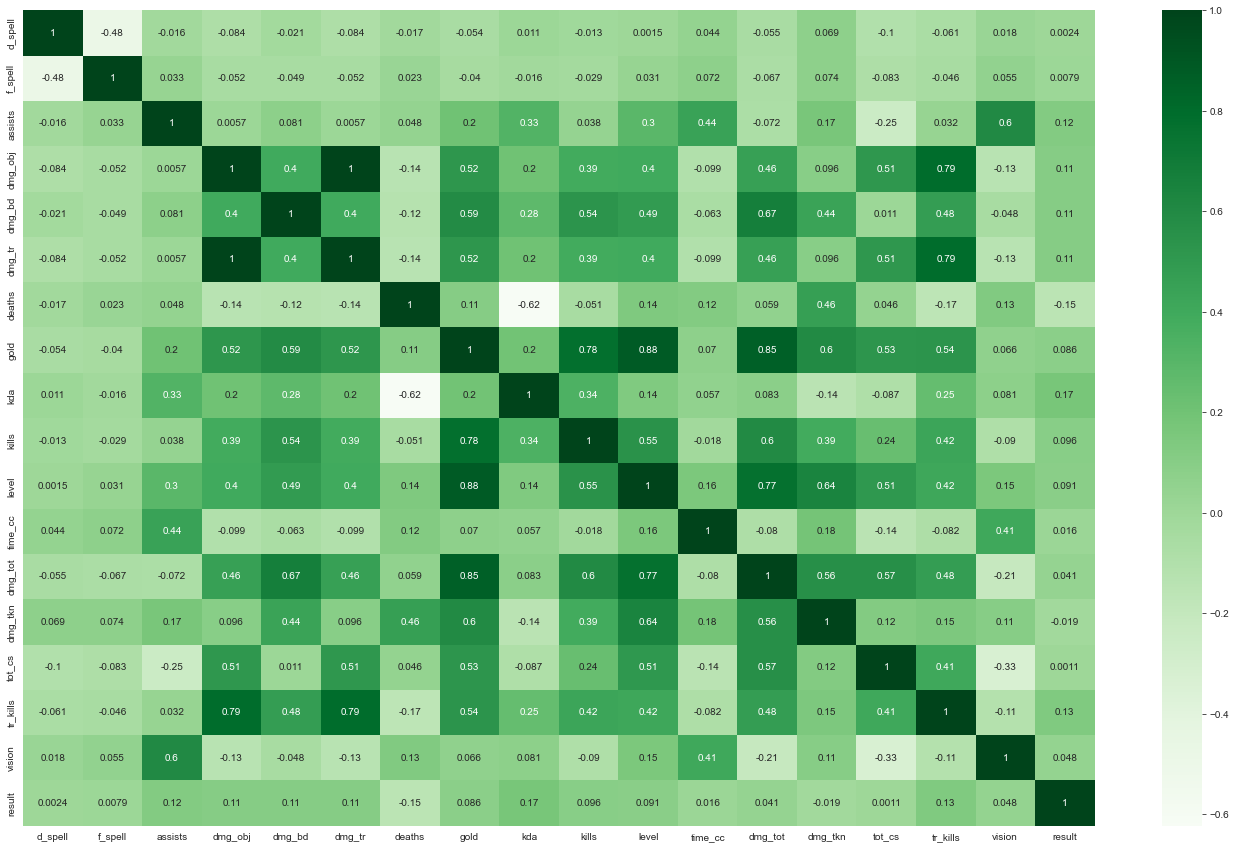

In [21]:
#koefisien korealsi untuk melihat variable yang berkaitan

plt.figure(figsize = (24, 15))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.show()

#### Deskripsi Statistikal
- - -

In [22]:
df.describe()

,d_spell,f_spell,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision
count,17228.000000,17228.000000,17228.00000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000,17228.000000
mean,7.340260,7.629092,7.98932,2583.977537,9312.937137,2583.977537,5.529545,10591.858718,3.705402,5.510854,13.580915,18.535001,112809.107325,20402.957685,117.864233,0.991990,29.703448
std,4.200008,4.263604,5.56389,3181.529316,10288.452082,3181.529316,2.977635,3500.579298,3.941655,4.250384,2.425559,15.196081,69421.952092,9649.852562,81.779216,1.276689,21.008276
min,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2900.000000,0.000000,0.000000,6.000000,0.000000,3597.000000,1736.000000,0.000000,0.000000,1.000000
25%,4.000000,4.000000,4.00000,354.000000,1848.500000,354.000000,3.000000,8007.500000,1.333333,2.000000,12.000000,9.000000,61978.250000,13464.000000,33.000000,0.000000,16.000000
50%,4.000000,4.000000,7.00000,1537.000000,5477.000000,1537.000000,5.000000,10169.000000,2.400000,5.000000,14.000000,16.000000,108920.000000,18803.000000,131.000000,1.000000,24.000000
75%,12.000000,12.000000,11.00000,3700.000000,13425.000000,3700.000000,7.000000,12815.000000,4.500000,8.000000,15.000000,25.000000,154894.750000,25496.750000,183.000000,2.000000,36.000000
max,21.000000,21.000000,41.00000,50654.000000,85778.000000,50654.000000,21.000000,28566.000000,35.000000,30.000000,18.000000,304.000000,557084.000000,102473.000000,472.000000,9.000000,175.000000


In [23]:
df.head(1)

,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False


#### Perbandingan total gold dengan Kill/Death Average, Total Damage, dan jumlah Kill
- - -

Text(0.5, 1.0, 'kills vs damage total')

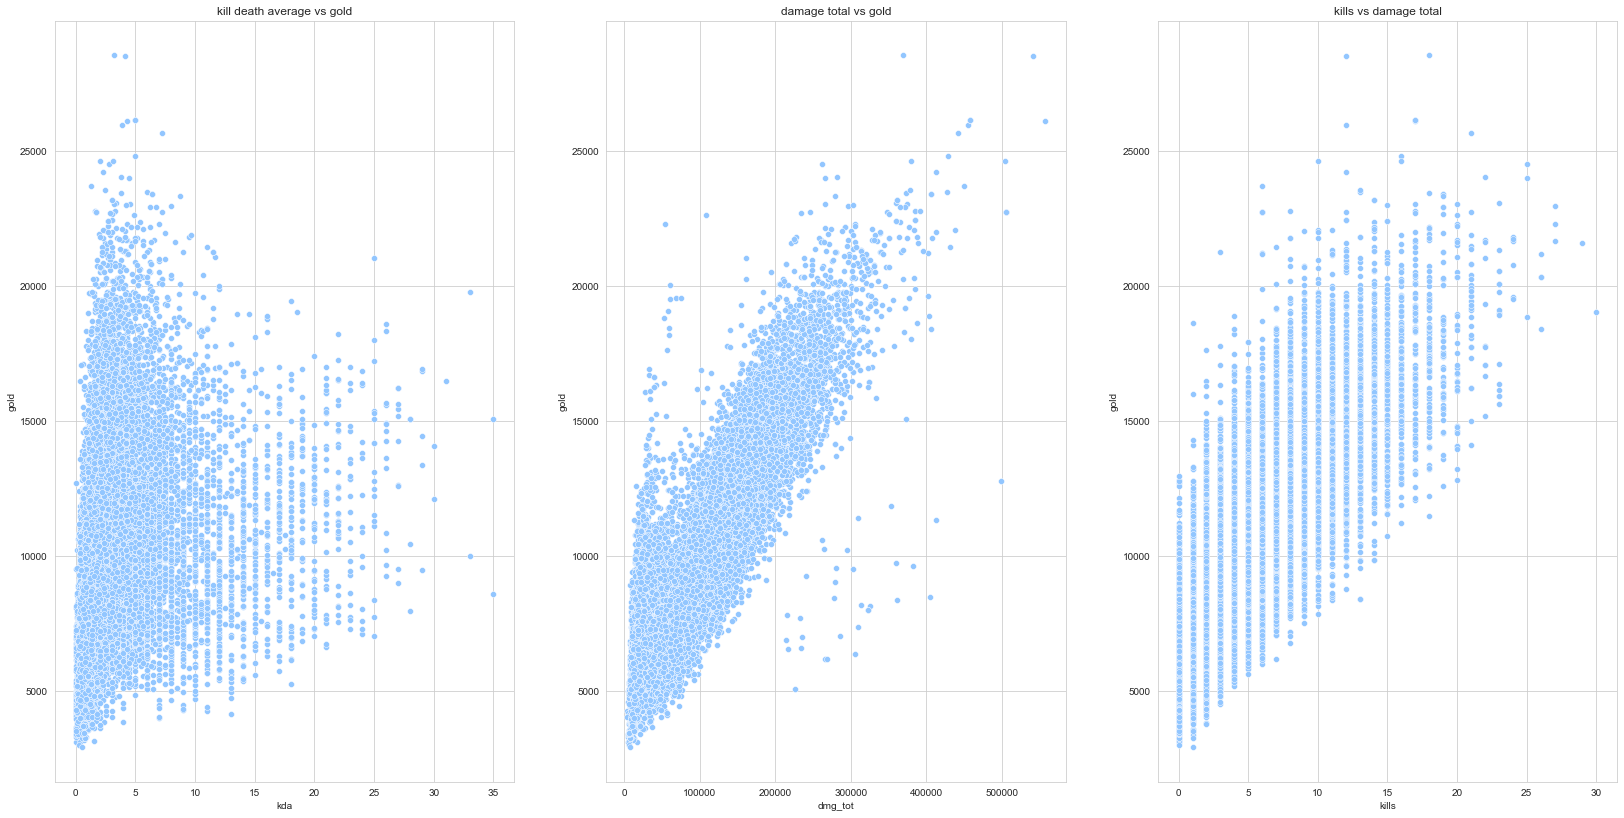

In [24]:
plt.figure(figsize=(28, 14))
plt.subplot(1, 3, 1)
sns.scatterplot(x='kda', y='gold', data=df)
plt.title('kill death average vs gold')

plt.subplot(1, 3, 2)
sns.scatterplot(x='dmg_tot', y='gold', data=df)
plt.title('damage total vs gold')

plt.subplot(1, 3, 3)
sns.scatterplot(x='kills', y='gold', data=df)
plt.title('kills vs damage total')

#### -Dari visualisasi diatas di dapatkan informasi bahwa :
    
    - Jumlah gold yang di dapatkan oleh player tidak terlalu mempengaruhi performa di dalam game secara signifikan dapat di lihat dari tabel KDA vs Gold yang datanya lebih merata dari gold rendah ke gold yang tinggi .

    - Jumlah gold dapat mempengaruhi kill secara exponensial, sehingga semakin banyak gold yang bisa di dapatkan oleh player semakin tinggi juga kemungkinan mereka mendapatkan score Kill yang tinggi .
    
    - Jumlah gold sangat mempengaruhi Total Damage yang dihasilkan oleh player dapat dilihat dari data di grafik Gold vs Total Damage bahwa total damage yang dapat di hasilkan meningkat dengan jelas karena semakin banyak gold yang di dapatkan akan memberikan akses bagi player untuk membeli item-item yang membantu dia untuk menghasilkan damage yang besar juga .

#### Perbandingan match result antara victory dan defeat
- - -

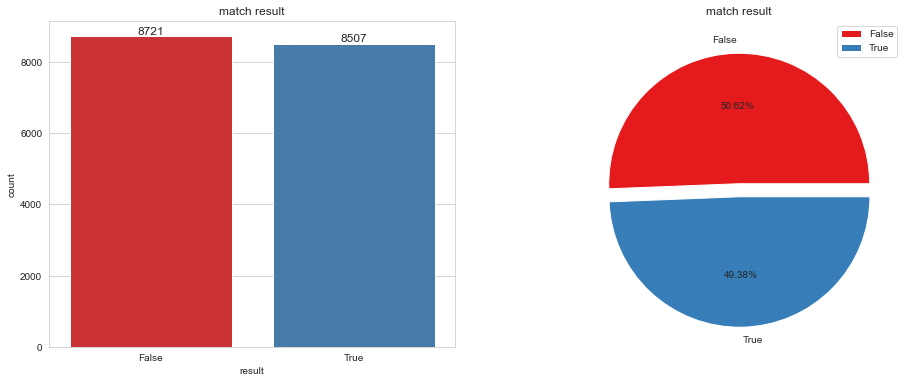

In [25]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
ax = sns.countplot(x='result', data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('match result')

plt.subplot(1,2,2)
plt.pie(df['result'].value_counts(), labels=df['result'].unique() ,colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('match result')
plt.legend()
plt.show()

- Dari total 17228 data pertandingan, sebanyak 8507 atau 49,38% mengalami kekalahan. sedangkan sebanyak 8721 atau 50,62% mengalami kekalahan

In [26]:
df.head(1)

,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False


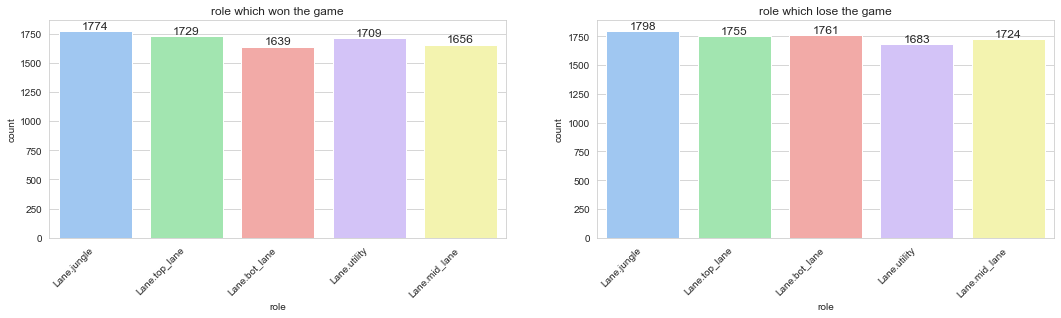

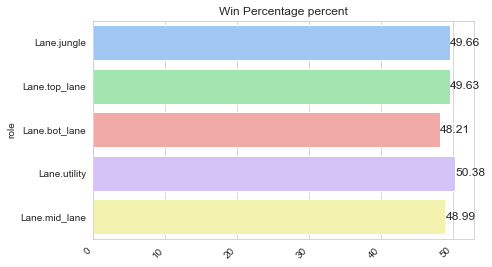

In [27]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x='role', data=df.query('result==True'), order=df['role'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('role which won the game')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
ax = sns.countplot(x='role', data=df.query('result==False'), order=df['role'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('role which lose the game')
plt.xticks(rotation=45, ha='right')


###############################

ratio_role = df.query('result==True').value_counts('role')
ratio_role = ratio_role.astype(np.float64)
for i, (k,v) in enumerate(ratio_role.items()):
    ratio_role[k]= (ratio_role[k]/df[(df['role']==k)].value_counts('role')*100).round(2)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
ax = sns.barplot(y=ratio_role.index, x=ratio_role.values, order=df['role'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Win Percentage percent')
plt.xticks(rotation=45, ha='right')
plt.show()


- Dari visual diatas, didapatkan informasi bahwa:
    - Dari grafik `role which has won the game` kita mendapatkan `role` yang paling seling memenangkan game adalah role `jungler`
    - Dari grafik `role which has lose the game` kita mendapatkan `role` yang paling sering kalah adalah role `jungler` juga
    - Namun dari grafik `Win Percentage percent` kita mendapatkan bahwa role `toplane` ternyata adalah role yang memiliki winrate tertinggi senilai 50.83%, diikuti oleh `role` `Jungler` yang memiliki win rate 50%, di akhiri dengan `role` `midlane` yang memiliki nilai winrate terendah dibandingkan `role lainnya
    

In [28]:
df.role.value_counts()

Lane.jungle      3572
Lane.top_lane    3484
Lane.bot_lane    3400
Lane.utility     3392
Lane.mid_lane    3380
Name: role, dtype: int64

#### Feature Selection

In [29]:
df.head()

,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False
1,1,4,Ashe,Side.red,Lane.bot_lane,7,4885,9190,4885,5,10168,2.000000,3,14,26,84282,17148,166,3,24,True
2,4,12,Galio,Side.blue,Lane.mid_lane,13,1871,3221,1871,7,12038,3.571429,12,14,34,109405,26211,147,1,29,False
3,4,11,Nunu,Side.red,Lane.jungle,6,0,4920,0,6,7570,1.500000,3,12,21,109911,22136,25,0,29,False
4,4,14,Nautilus,Side.blue,Lane.utility,2,0,0,0,3,4377,1.000000,1,8,14,17853,6680,37,0,20,False


## Data Preprocessing
---

### A. Mengambil Data Inference

In [30]:
df_inf = df.sample(200, random_state=17)
df_inf

,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
4635,4,14,Thresh,Side.red,Lane.utility,13,726,3512,726,0,6496,15.000000,2,12,11,17495,5307,33,0,61,True
15690,12,4,Leblanc,Side.red,Lane.mid_lane,2,0,0,0,5,5546,0.800000,2,9,13,38294,10223,84,0,13,False
11809,11,4,Nidalee,Side.red,Lane.jungle,6,0,11960,0,6,8663,1.333333,2,13,6,109515,33899,48,0,32,True
10408,4,11,Karthus,Side.red,Lane.jungle,13,1264,25495,1264,8,11373,2.750000,9,14,9,156847,21176,41,1,13,True
11650,4,11,Nidalee,Side.red,Lane.jungle,14,5373,26394,5373,6,15876,4.500000,13,17,5,189702,35473,63,2,41,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6129,4,7,Sona,Side.blue,Lane.utility,10,2075,4668,2075,4,5887,2.750000,1,10,6,18238,8139,12,2,20,True
13778,12,4,Xerath,Side.blue,Lane.mid_lane,2,0,678,0,3,7271,1.333333,2,13,16,81532,10974,159,0,11,False
5694,4,14,Nami,Side.blue,Lane.utility,13,93,375,93,5,6827,2.600000,0,12,19,7857,11547,8,0,59,True
15628,4,7,Jhin,Side.blue,Lane.bot_lane,6,3667,4430,3667,5,12033,2.400000,6,13,18,140053,15393,208,0,21,True


In [31]:
# mengeluarkan data inference dari data set

df_train_test = df.drop(df_inf.index)
df_train_test.head()

,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False
1,1,4,Ashe,Side.red,Lane.bot_lane,7,4885,9190,4885,5,10168,2.000000,3,14,26,84282,17148,166,3,24,True
2,4,12,Galio,Side.blue,Lane.mid_lane,13,1871,3221,1871,7,12038,3.571429,12,14,34,109405,26211,147,1,29,False
3,4,11,Nunu,Side.red,Lane.jungle,6,0,4920,0,6,7570,1.500000,3,12,21,109911,22136,25,0,29,False
4,4,14,Nautilus,Side.blue,Lane.utility,2,0,0,0,3,4377,1.000000,1,8,14,17853,6680,37,0,20,False


In [32]:
# melakukan reset pada nomer indeks dari data set dan data inference

df_train_test.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)
df_inf

,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
0,4,14,Thresh,Side.red,Lane.utility,13,726,3512,726,0,6496,15.000000,2,12,11,17495,5307,33,0,61,True
1,12,4,Leblanc,Side.red,Lane.mid_lane,2,0,0,0,5,5546,0.800000,2,9,13,38294,10223,84,0,13,False
2,11,4,Nidalee,Side.red,Lane.jungle,6,0,11960,0,6,8663,1.333333,2,13,6,109515,33899,48,0,32,True
3,4,11,Karthus,Side.red,Lane.jungle,13,1264,25495,1264,8,11373,2.750000,9,14,9,156847,21176,41,1,13,True
4,4,11,Nidalee,Side.red,Lane.jungle,14,5373,26394,5373,6,15876,4.500000,13,17,5,189702,35473,63,2,41,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,7,Sona,Side.blue,Lane.utility,10,2075,4668,2075,4,5887,2.750000,1,10,6,18238,8139,12,2,20,True
196,12,4,Xerath,Side.blue,Lane.mid_lane,2,0,678,0,3,7271,1.333333,2,13,16,81532,10974,159,0,11,False
197,4,14,Nami,Side.blue,Lane.utility,13,93,375,93,5,6827,2.600000,0,12,19,7857,11547,8,0,59,True
198,4,7,Jhin,Side.blue,Lane.bot_lane,6,3667,4430,3667,5,12033,2.400000,6,13,18,140053,15393,208,0,21,True


- - -
### B. Data Split

#### Pada dataset ini ingin memprediksi hasil match menang atua kalah, sehingga kolom `result` menjadi target/label

In [33]:
X = df_train_test.drop(['result'], axis=1)
y = df_train_test['result']
X.head(5)

,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision
0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59
1,1,4,Ashe,Side.red,Lane.bot_lane,7,4885,9190,4885,5,10168,2.000000,3,14,26,84282,17148,166,3,24
2,4,12,Galio,Side.blue,Lane.mid_lane,13,1871,3221,1871,7,12038,3.571429,12,14,34,109405,26211,147,1,29
3,4,11,Nunu,Side.red,Lane.jungle,6,0,4920,0,6,7570,1.500000,3,12,21,109911,22136,25,0,29
4,4,14,Nautilus,Side.blue,Lane.utility,2,0,0,0,3,4377,1.000000,1,8,14,17853,6680,37,0,20


#### Memisahkan Data Train dan Data set

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

print(X_train.shape)
print(X_test.shape)

(11919, 20)
(5109, 20)


- - - 
### C. Handling Outlier

Melakukan pengecekan terhadap outliers pada masing-masing kolom numerik. 

-Apabila terdeteksi adanya outliers <5% akan dilakukan trimming

-Apabila terdeteksi adanya outliers >5% akan dilakukan capping

-Alasan digunakannya metode capping pada data yang membutuhkan adalah karena capping tidak menghapus data

In [35]:
X_train_distr = pd.DataFrame({'columns':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
X_train_distr.reset_index(drop=True, inplace=True)
X_train_distr['distribution'] = np.where((X_train_distr['skew'] < 0.5) & (X_train_distr['skew'] > - 0.5) , 'Normal', 'Skew')
X_train_distr

,columns,skew,distribution
0,d_spell,0.502654,Skew
1,f_spell,0.379028,Normal
2,assists,1.140562,Skew
3,dmg_obj,2.798936,Skew
4,dmg_bd,1.711557,Skew
5,dmg_tr,2.798936,Skew
6,deaths,0.453266,Normal
7,gold,0.621880,Skew
8,kda,2.631898,Skew
9,kills,1.089022,Skew


- Mayoritas dari kolom numeric di dalam data set memiliki distribusi yang skewed

In [36]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - distance * IQR
    upper = df[variable].quantile(0.75) + distance * IQR

    return upper, lower

In [37]:
j = 0
outliers={}
for i in X_train.describe().columns:
    if X_train_distr['distribution'].loc[(X_train_distr['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Boundary Lower and Upper {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1

Batas lower dan upper untuk d_spell:(-8.0, 24.0)
Boundary Lower and Upper f_spell:(-5.179270611438999, 20.40521238507773)
Batas lower dan upper untuk assists:(-6.5, 21.5)
Batas lower dan upper untuk dmg_obj:(-4774.5, 8893.5)
Batas lower dan upper untuk dmg_bd:(-15402.0, 30634.0)
Batas lower dan upper untuk dmg_tr:(-4774.5, 8893.5)
Boundary Lower and Upper deaths:(-3.368702995786868, 14.459734122559247)
Batas lower dan upper untuk gold:(864.0, 19948.0)
Batas lower dan upper untuk kda:(-3.500000000000001, 9.3)
Batas lower dan upper untuk kills:(-7.0, 17.0)
Boundary Lower and Upper level:(6.307446626402985, 20.851543221738638)
Batas lower dan upper untuk time_cc:(-15.0, 49.0)
Batas lower dan upper untuk dmg_tot:(-76197.75, 293024.25)
Batas lower dan upper untuk dmg_tkn:(-4709.75, 43692.25)
Boundary Lower and Upper tot_cs:(-127.43980200360915, 364.9402634517172)
Batas lower dan upper untuk tr_kills:(-3.0, 5.0)
Batas lower dan upper untuk vision:(-14.0, 66.0)


In [38]:
for i, (k, v) in enumerate(outliers.items()):
    X_train_distr_handling= X_train.loc[~outliers[k]]
    X_train_distr.loc[i,'trimmed_row'] = X_train.shape[0] - X_train_distr_handling.shape[0]
    X_train_distr.loc[i,'percentage'] = np.round(100-(X_train_distr_handling.shape[0]/X_train.shape[0]*100), 2)
    X_train_distr.loc[i,'action'] = np.where(X_train_distr.loc[i,'percentage']==0, 'No Action', 
                                        np.where(X_train_distr.loc[i,'percentage']>2, 'Capping/Windsorizer', 'Trimming'))
                                    
                                        

In [39]:
X_train_distr

,columns,skew,distribution,trimmed_row,percentage,action
0,d_spell,0.502654,Skew,0.0,0.00,No Action
1,f_spell,0.379028,Normal,30.0,0.25,Trimming
2,assists,1.140562,Skew,300.0,2.52,Capping/Windsorizer
3,dmg_obj,2.798936,Skew,577.0,4.84,Capping/Windsorizer
4,dmg_bd,1.711557,Skew,629.0,5.28,Capping/Windsorizer
5,dmg_tr,2.798936,Skew,577.0,4.84,Capping/Windsorizer
6,deaths,0.453266,Normal,55.0,0.46,Trimming
7,gold,0.621880,Skew,140.0,1.17,Trimming
8,kda,2.631898,Skew,915.0,7.68,Capping/Windsorizer
9,kills,1.089022,Skew,185.0,1.55,Trimming


In [40]:
outliers_tot = outliers['outliers1']
for i, (k, v) in enumerate(outliers.items()):
    if i in [1,6,7,9,10,12,14,15]:
        outliers_tot += outliers[k]

In [41]:
X_train_trimmed = X_train.loc[~outliers_tot]
y_train_trimmed = y_train.loc[~outliers_tot]

print(f"Jumlah baris pada X_train SEBELUM di Trimming: {X_train.shape[0]}")
print(f"Jumlah baris pada X_train SETELAH di Trimming: {X_train_trimmed.shape[0]}")
print(f"% Outlier dari Keseluruhan Data: {100-(X_train_trimmed.shape[0]/X_train.shape[0]*100):.2f}%")

Jumlah baris pada X_train SEBELUM di Trimming: 11919
Jumlah baris pada X_train SETELAH di Trimming: 11412
% Outlier dari Keseluruhan Data: 4.25%


In [42]:

windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables=['dmg_bd', 'kda', 'vision'],
                          missing_values='ignore')

windsoriser.fit(X_train_trimmed)
X_train_t = windsoriser.transform(X_train_trimmed)

In [43]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'dmg_bd': -14253.625, 'kda': -3.3857142849999997, 'vision': -14.0}
Right Tail Caps :  {'dmg_bd': 28513.375, 'kda': 9.071428571, 'vision': 66.0}


In [44]:
print('X_train - Before Capping')
print(X_train.describe())
print('')
print('X_train - After Capping')
print(X_train_t.describe())

X_train - Before Capping
            d_spell       f_spell       assists       dmg_obj        dmg_bd  \
count  11919.000000  11919.000000  11919.000000  11919.000000  11919.000000   
mean       7.337025      7.612971      7.943200   2599.224348   9276.239701   
std        4.204509      4.264080      5.492314   3187.732148  10214.339904   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        4.000000      4.000000      4.000000    351.000000   1861.500000   
50%        4.000000      4.000000      7.000000   1535.000000   5460.000000   
75%       12.000000     12.000000     11.000000   3768.000000  13370.500000   
max       21.000000     21.000000     41.000000  44659.000000  85778.000000   

             dmg_tr        deaths          gold           kda         kills  \
count  11919.000000  11919.000000  11919.000000  11919.000000  11919.000000   
mean    2599.224348      5.545516  10597.558268      3.674361      5.493078   
std     3187.732148      2

In [45]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [46]:
X_train_distr

,columns,skew,distribution,trimmed_row,percentage,action
0,d_spell,0.502654,Skew,0.0,0.00,No Action
1,f_spell,0.379028,Normal,30.0,0.25,Trimming
2,assists,1.140562,Skew,300.0,2.52,Capping/Windsorizer
3,dmg_obj,2.798936,Skew,577.0,4.84,Capping/Windsorizer
4,dmg_bd,1.711557,Skew,629.0,5.28,Capping/Windsorizer
5,dmg_tr,2.798936,Skew,577.0,4.84,Capping/Windsorizer
6,deaths,0.453266,Normal,55.0,0.46,Trimming
7,gold,0.621880,Skew,140.0,1.17,Trimming
8,kda,2.631898,Skew,915.0,7.68,Capping/Windsorizer
9,kills,1.089022,Skew,185.0,1.55,Trimming


f_spell - Before Trimming


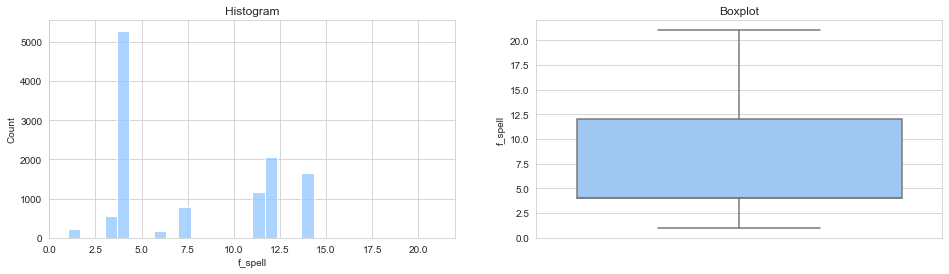


f_spell - After Trimming


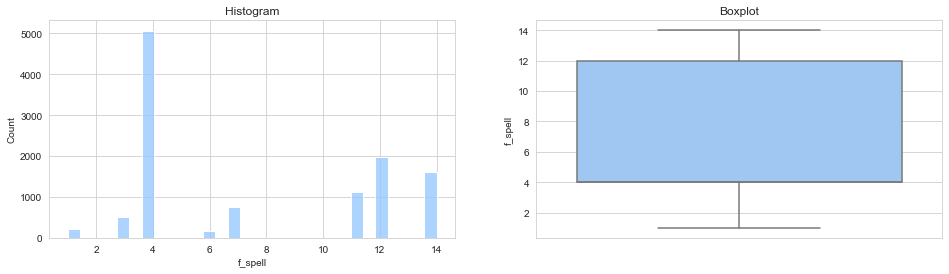


assists - Before Capping


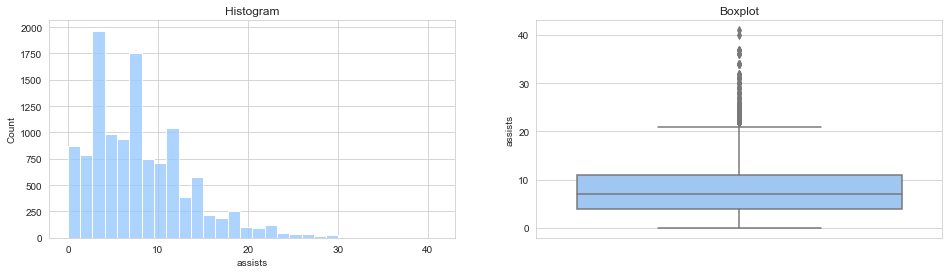


assists - After Capping


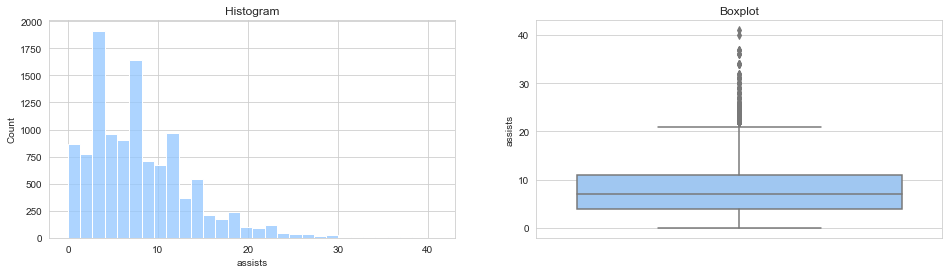


dmg_obj - Before Capping


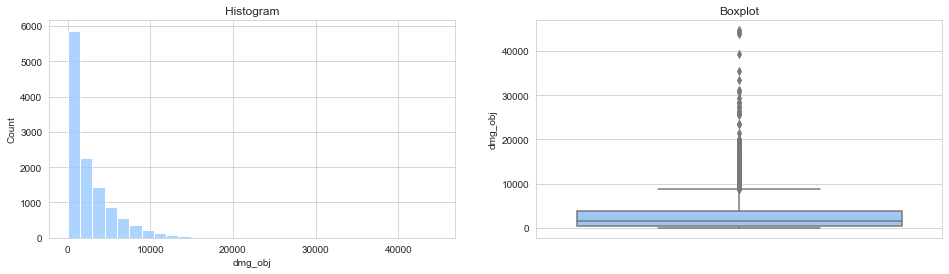


dmg_obj - After Capping


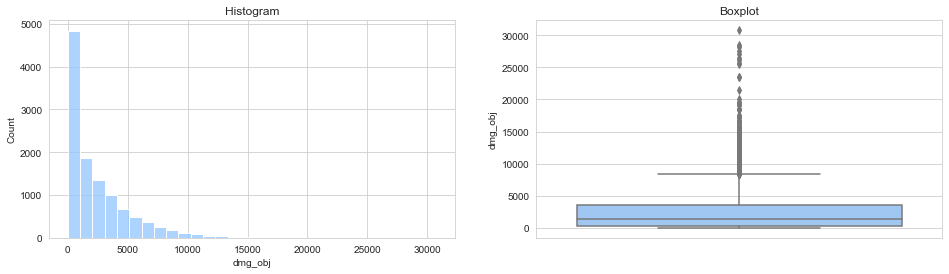


dmg_bd - Before Capping


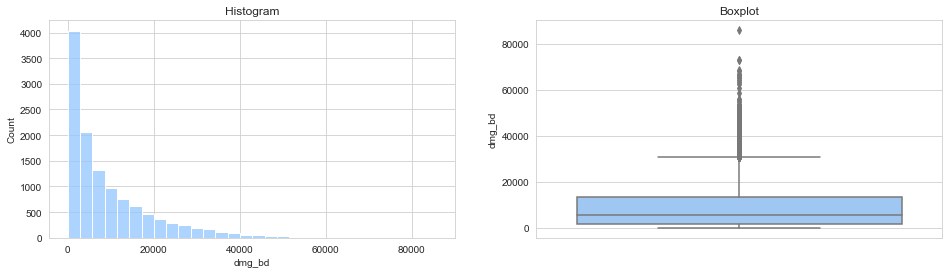


dmg_bd - After Capping


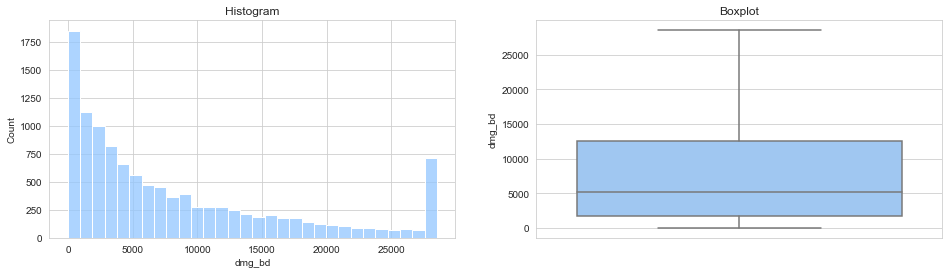


dmg_tr - Before Capping


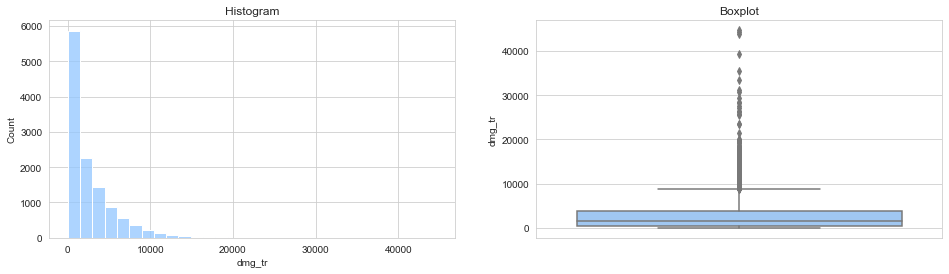


dmg_tr - After Capping


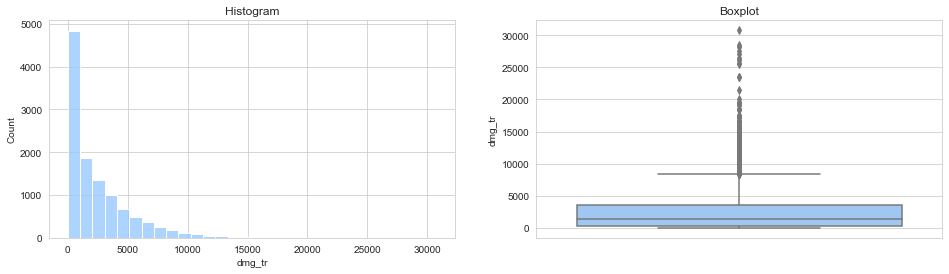


deaths - Before Trimming


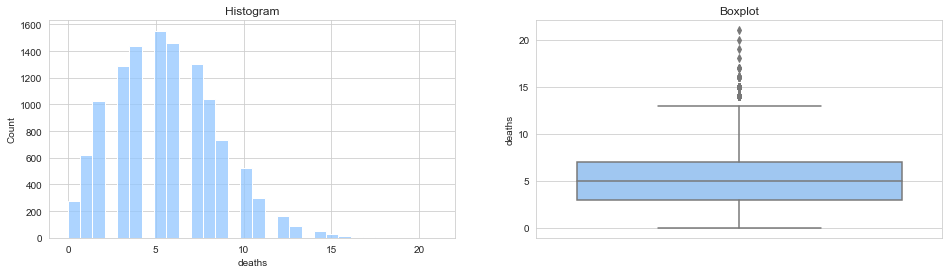


deaths - After Trimming


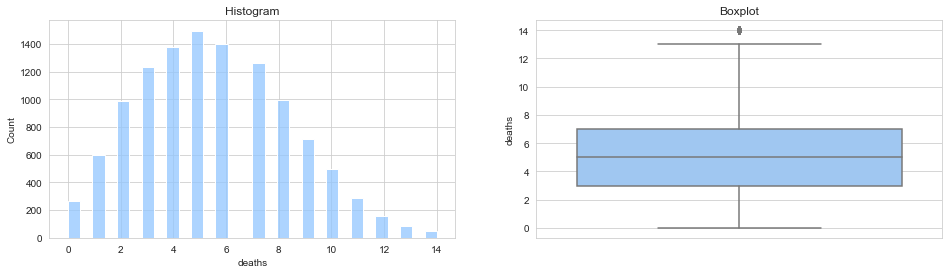


gold - Before Trimming


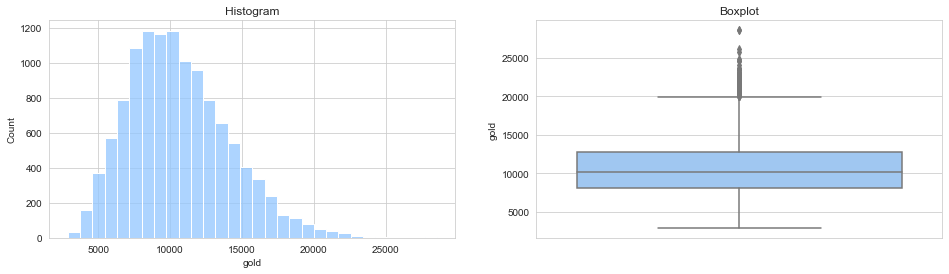


gold - After Trimming


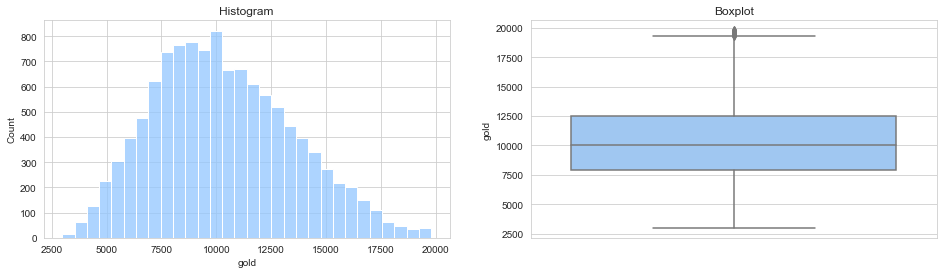


kda - Before Capping


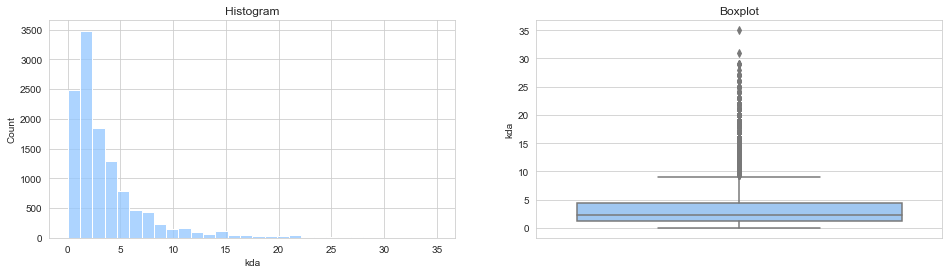


kda - After Capping


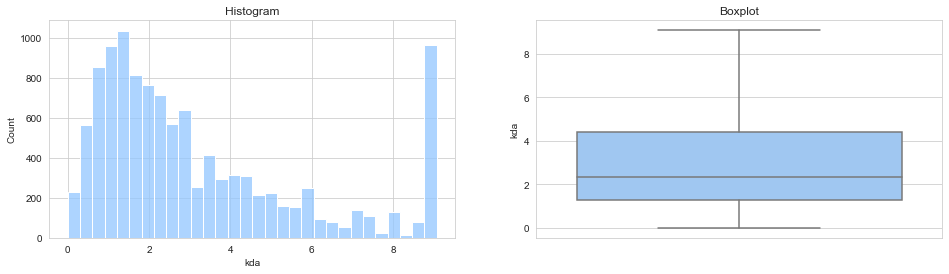


kills - Before Trimming


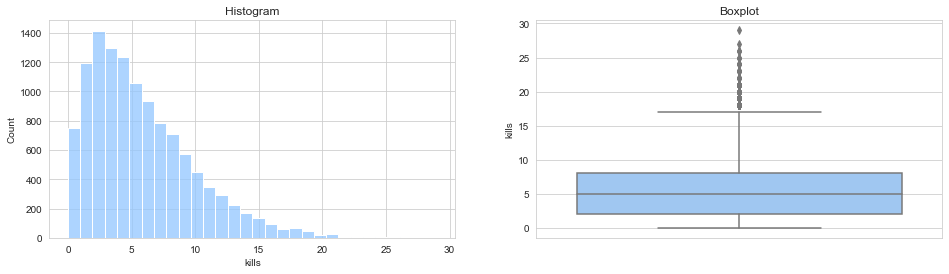


kills - After Trimming


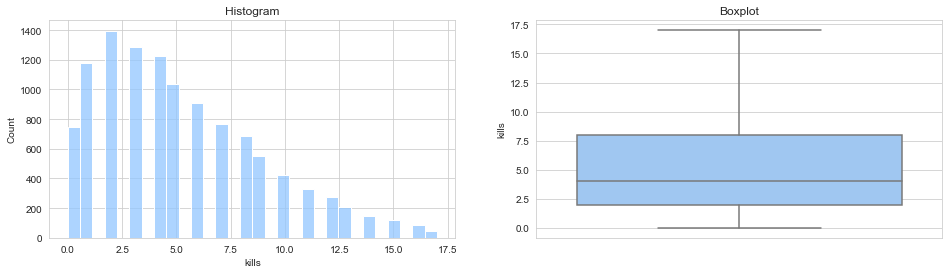


level - Before Capping


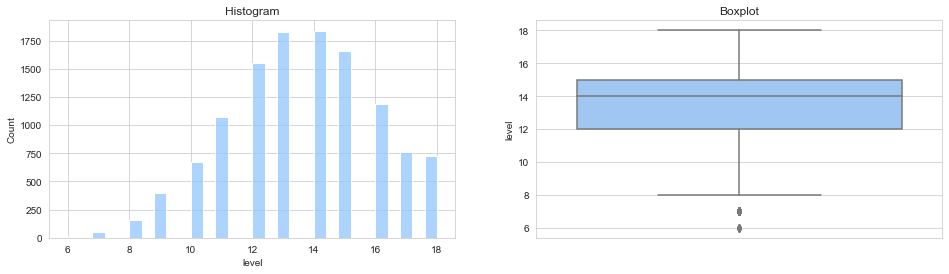


level - After Capping


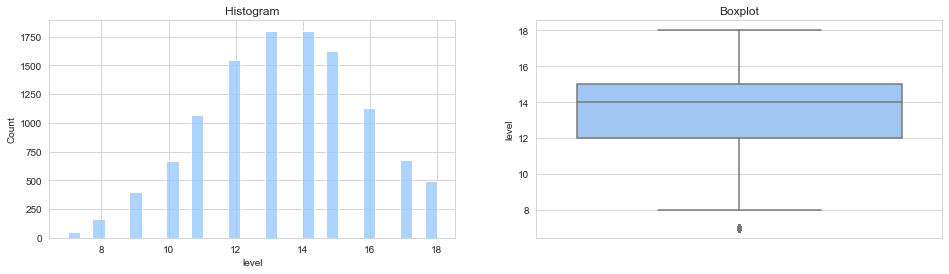


time_cc - Before Trimming


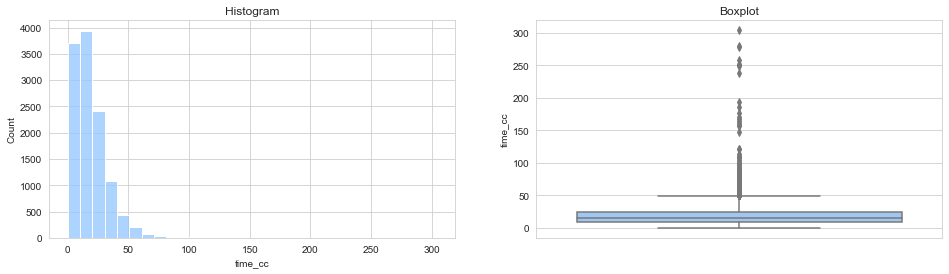


time_cc - After Trimming


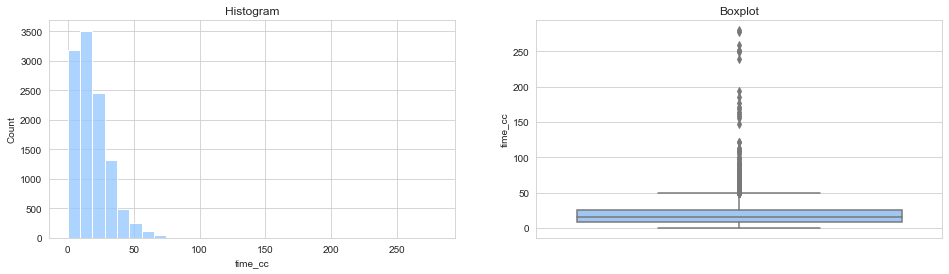


dmg_tot - Before Trimming


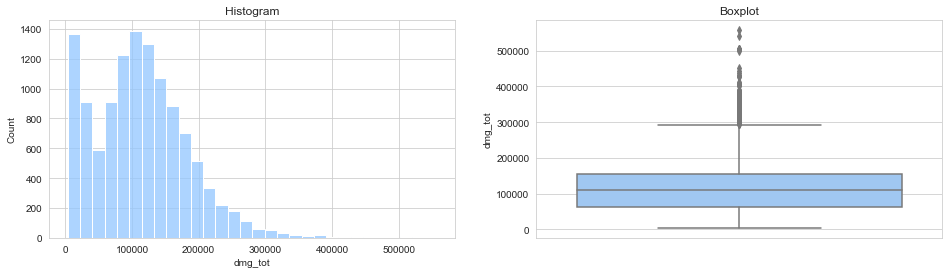


dmg_tot - After Trimming


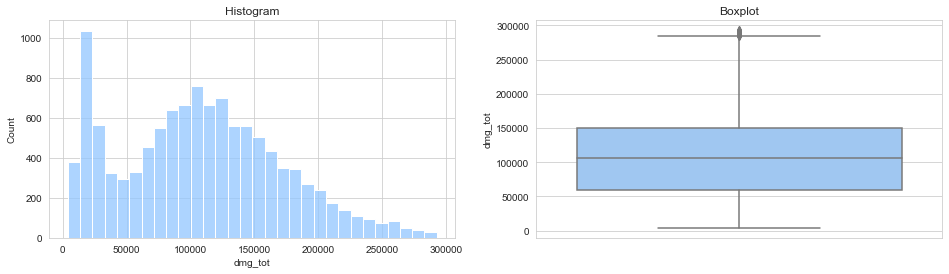


dmg_tkn - Before Capping


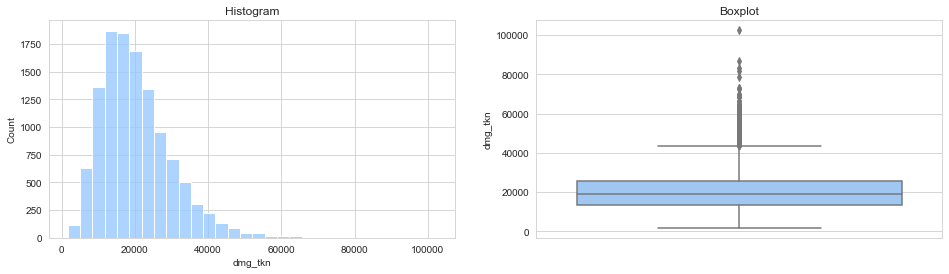


dmg_tkn - After Capping


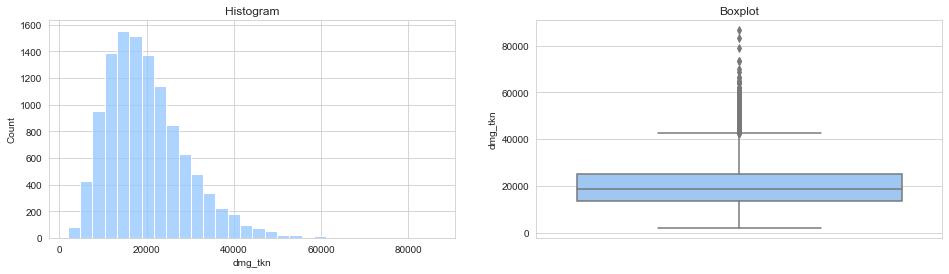


tot_cs - Before Trimming


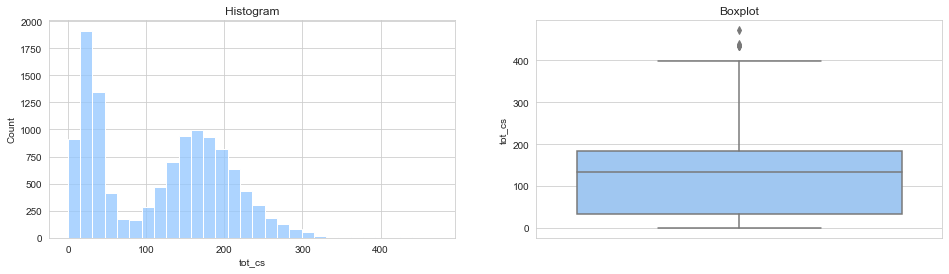


tot_cs - After Trimming


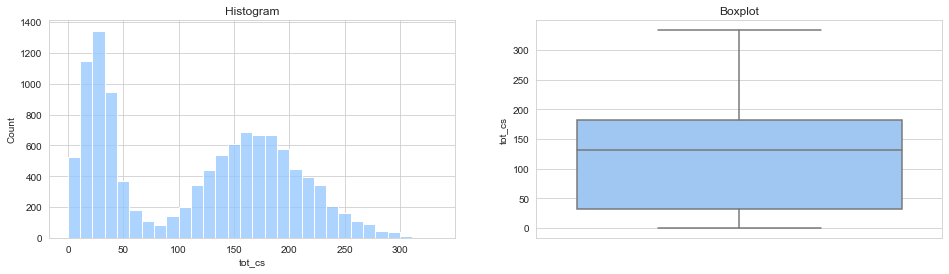


tr_kills - Before Trimming


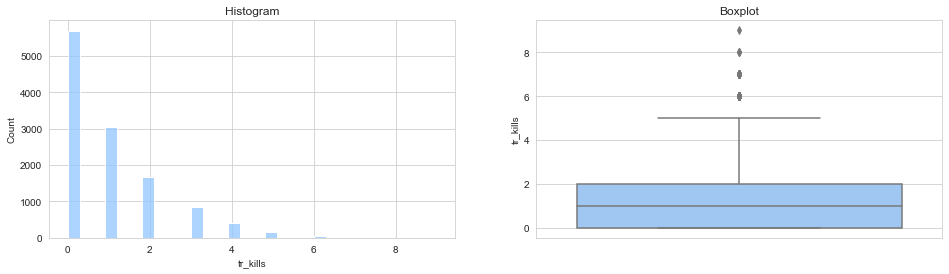


tr_kills - After Trimming


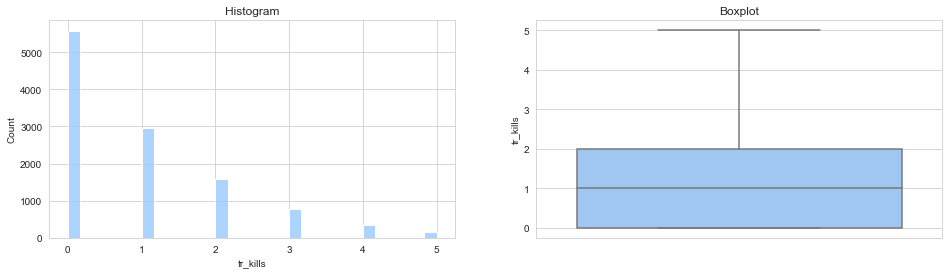


vision - Before Capping


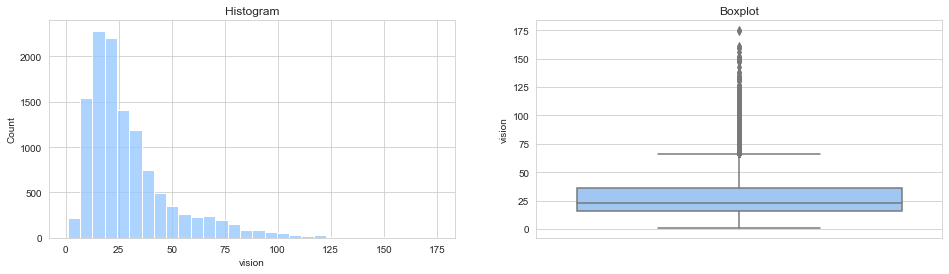


vision - After Capping


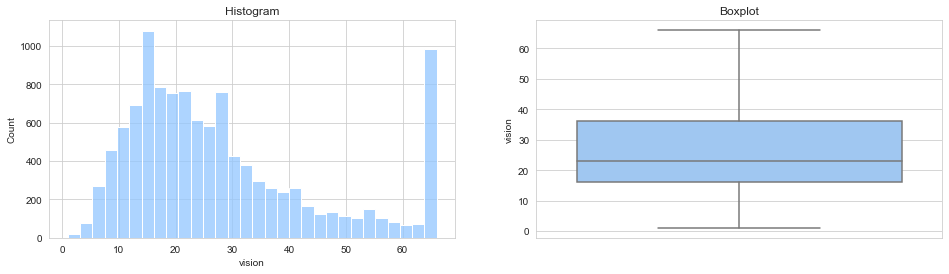

In [47]:
print('f_spell - Before Trimming')
diagnostic_plots(X_train, 'f_spell')
print('\nf_spell - After Trimming')
diagnostic_plots(X_train_t, 'f_spell')

print('\nassists - Before Capping')
diagnostic_plots(X_train, 'assists')
print('\nassists - After Capping')
diagnostic_plots(X_train_t, 'assists')

print('\ndmg_obj - Before Capping')
diagnostic_plots(X_train, 'dmg_obj')
print('\ndmg_obj - After Capping')
diagnostic_plots(X_train_t, 'dmg_obj')

print('\ndmg_bd - Before Capping')
diagnostic_plots(X_train, 'dmg_bd')
print('\ndmg_bd - After Capping')
diagnostic_plots(X_train_t, 'dmg_bd')

print('\ndmg_tr - Before Capping')
diagnostic_plots(X_train, 'dmg_tr')
print('\ndmg_tr - After Capping')
diagnostic_plots(X_train_t, 'dmg_tr')

print('\ndeaths - Before Trimming')
diagnostic_plots(X_train, 'deaths')
print('\ndeaths - After Trimming')
diagnostic_plots(X_train_t, 'deaths')

print('\ngold - Before Trimming')
diagnostic_plots(X_train, 'gold')
print('\ngold - After Trimming')
diagnostic_plots(X_train_t, 'gold')

print('\nkda - Before Capping')
diagnostic_plots(X_train, 'kda')
print('\nkda - After Capping')
diagnostic_plots(X_train_t, 'kda')

print('\nkills - Before Trimming')
diagnostic_plots(X_train, 'kills')
print('\nkills - After Trimming')
diagnostic_plots(X_train_t, 'kills')

print('\nlevel - Before Capping')
diagnostic_plots(X_train, 'level')
print('\nlevel - After Capping')
diagnostic_plots(X_train_t, 'level')

print('\ntime_cc - Before Trimming')
diagnostic_plots(X_train, 'time_cc')
print('\ntime_cc - After Trimming')
diagnostic_plots(X_train_t, 'time_cc')

print('\ndmg_tot - Before Trimming')
diagnostic_plots(X_train, 'dmg_tot')
print('\ndmg_tot - After Trimming')
diagnostic_plots(X_train_t, 'dmg_tot')

print('\ndmg_tkn - Before Capping')
diagnostic_plots(X_train, 'dmg_tkn')
print('\ndmg_tkn - After Capping')
diagnostic_plots(X_train_t, 'dmg_tkn')

print('\ntot_cs - Before Trimming')
diagnostic_plots(X_train, 'tot_cs')
print('\ntot_cs - After Trimming')
diagnostic_plots(X_train_t, 'tot_cs')

print('\ntr_kills - Before Trimming')
diagnostic_plots(X_train, 'tr_kills')
print('\ntr_kills - After Trimming')
diagnostic_plots(X_train_t, 'tr_kills')

print('\nvision - Before Capping')
diagnostic_plots(X_train, 'vision')
print('\nvision - After Capping')
diagnostic_plots(X_train_t, 'vision')

### D. Handling Missing Values

In [48]:
X_train_t.isna().sum()

d_spell     0
f_spell     0
champion    0
side        0
role        0
assists     0
dmg_obj     0
dmg_bd      0
dmg_tr      0
deaths      0
gold        0
kda         0
kills       0
level       0
time_cc     0
dmg_tot     0
dmg_tkn     0
tot_cs      0
tr_kills    0
vision      0
dtype: int64

- Tidak ada missing value sehingga tidak akan di lakukan handling missing value

### E. Feature Selection

In [49]:
df.head()

,d_spell,f_spell,champion,side,role,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
0,14,4,Leona,Side.blue,Lane.utility,9,0,63,0,9,5933,1.111111,1,11,39,13802,17876,25,0,59,False
1,1,4,Ashe,Side.red,Lane.bot_lane,7,4885,9190,4885,5,10168,2.000000,3,14,26,84282,17148,166,3,24,True
2,4,12,Galio,Side.blue,Lane.mid_lane,13,1871,3221,1871,7,12038,3.571429,12,14,34,109405,26211,147,1,29,False
3,4,11,Nunu,Side.red,Lane.jungle,6,0,4920,0,6,7570,1.500000,3,12,21,109911,22136,25,0,29,False
4,4,14,Nautilus,Side.blue,Lane.utility,2,0,0,0,3,4377,1.000000,1,8,14,17853,6680,37,0,20,False


In [50]:
df.corr()

,d_spell,f_spell,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,result
d_spell,1.000000,-0.482720,-0.015718,-0.083755,-0.020877,-0.083755,-0.017421,-0.053554,0.010679,-0.013383,0.001480,0.043747,-0.054723,0.069461,-0.102421,-0.060819,0.018089,0.002389
f_spell,-0.482720,1.000000,0.033406,-0.052067,-0.049225,-0.052067,0.022687,-0.039668,-0.016474,-0.028568,0.030777,0.071988,-0.067337,0.074410,-0.083063,-0.046178,0.054809,0.007878
assists,-0.015718,0.033406,1.000000,0.005723,0.080817,0.005723,0.048379,0.203096,0.325896,0.038000,0.296346,0.442725,-0.071610,0.165888,-0.246936,0.031515,0.600738,0.124574
dmg_obj,-0.083755,-0.052067,0.005723,1.000000,0.397461,1.000000,-0.137559,0.524311,0.203011,0.388717,0.395753,-0.099480,0.458801,0.095597,0.513024,0.794206,-0.134660,0.111393
dmg_bd,-0.020877,-0.049225,0.080817,0.397461,1.000000,0.397461,-0.124575,0.592423,0.275055,0.537254,0.489580,-0.063051,0.674766,0.439077,0.010986,0.475270,-0.047672,0.106948
dmg_tr,-0.083755,-0.052067,0.005723,1.000000,0.397461,1.000000,-0.137559,0.524311,0.203011,0.388717,0.395753,-0.099480,0.458801,0.095597,0.513024,0.794206,-0.134660,0.111393
deaths,-0.017421,0.022687,0.048379,-0.137559,-0.124575,-0.137559,1.000000,0.108336,-0.622546,-0.050804,0.139151,0.123704,0.058657,0.464657,0.045920,-0.165844,0.131494,-0.150969
gold,-0.053554,-0.039668,0.203096,0.524311,0.592423,0.524311,0.108336,1.000000,0.195239,0.775085,0.881448,0.069868,0.854397,0.598918,0.529932,0.536078,0.066279,0.085553
kda,0.010679,-0.016474,0.325896,0.203011,0.275055,0.203011,-0.622546,0.195239,1.000000,0.342135,0.137621,0.056626,0.083323,-0.143206,-0.086629,0.251760,0.080578,0.169717
kills,-0.013383,-0.028568,0.038000,0.388717,0.537254,0.388717,-0.050804,0.775085,0.342135,1.000000,0.548197,-0.017878,0.595498,0.391220,0.235966,0.424038,-0.089576,0.095965


In [51]:
champion_vs_target=pd.crosstab(X_train_t["champion"],y_train)
stat, p, dof, expected = stats.chi2_contingency(champion_vs_target)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.188
Probably independent


In [52]:
side_vs_target=pd.crosstab(X_train_t["side"],y_train)
stat, p, dof, expected = stats.chi2_contingency(side_vs_target)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.729
Probably independent


In [53]:
role_vs_target=pd.crosstab(X_train_t["role"],y_train)
stat, p, dof, expected = stats.chi2_contingency(role_vs_target)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.419
Probably independent


In [54]:
X_train_t.drop(['champion','side'], axis=1, inplace=True)
X_test.drop(['champion','side'] , axis=1, inplace=True)

- Kolom `champion` di hapus karena champion yang di pilih tidak mempengaruhi hasil kemenangan yang terlalu signifikan

- Kolom `side` di hapus karena dari kedua sisi peta sudah di atur sedemikian rupa sehingga tidak terlalu berpengaruh terhadap hasil pertandingan

- Kolom `role` tidak di hapus karena dari pengecekan dependency probability dan juga karena role yang dipilih mempengaruhi impact seorang pemain terhadap pertandingan atau game yang sedang berlangsung


### F. Splitting Columns (Numerical Columns and Categorical Columns)

In [55]:
# Get Numerical and Categorical Columns

num_columns = X_train_t.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_t.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns :  ['d_spell', 'f_spell', 'assists', 'dmg_obj', 'dmg_bd', 'dmg_tr', 'deaths', 'gold', 'kda', 'kills', 'level', 'time_cc', 'dmg_tot', 'dmg_tkn', 'tot_cs', 'tr_kills', 'vision']
Categorical Columns :  ['role']


In [56]:
# Split on X_train

X_train_t_num = X_train_t[num_columns]
X_train_t_cat = X_train_t[cat_columns]

# Split on X_test

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [57]:
# Feature Scaling

scaler = MinMaxScaler()
X_train_t_num_scaled = scaler.fit_transform(X_train_t_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [58]:
encoder = OrdinalEncoder()
X_train_t_cat_encoded = encoder.fit_transform(X_train_t_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [59]:
y_train_trimmed.replace({'no': 0, 'yes': 1},inplace = True)
y_test.replace({'no': 0, 'yes': 1},inplace = True)

### G. Concatenate between Numerical Columns and Categorical Columns

In [60]:
# Concate Data

X_train_final = np.concatenate([X_train_t_num_scaled, X_train_t_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [61]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,d_spell,f_spell,assists,dmg_obj,dmg_bd,dmg_tr,deaths,gold,kda,kills,level,time_cc,dmg_tot,dmg_tkn,tot_cs,tr_kills,vision,role
0,0.65,0.230769,0.097561,0.027935,0.030161,0.027935,0.214286,0.489266,0.404199,0.411765,0.636364,0.060714,0.327170,0.121658,0.540541,0.2,0.369231,2.0
1,0.15,0.769231,0.146341,0.165952,0.886882,0.165952,0.428571,0.857389,0.404199,0.941176,0.909091,0.057143,0.614466,0.347564,0.216216,0.4,0.230769,1.0
2,0.15,0.769231,0.097561,0.000000,0.037035,0.000000,0.642857,0.180613,0.061242,0.058824,0.272727,0.042857,0.234515,0.226934,0.045045,0.0,0.184615,1.0
3,0.15,1.000000,0.073171,0.010362,0.011188,0.010362,0.428571,0.197324,0.128609,0.235294,0.181818,0.050000,0.032964,0.114413,0.039039,0.0,0.476923,4.0
4,0.15,0.769231,0.317073,0.209771,0.563700,0.209771,0.714286,0.837110,0.286614,0.764706,1.000000,0.142857,0.648894,0.497648,0.180180,0.2,0.646154,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11407,0.15,0.769231,0.219512,0.111772,0.912098,0.111772,0.428571,0.714422,0.385827,0.705882,1.000000,0.146429,0.880965,0.416743,0.168168,0.4,0.461538,1.0
11408,0.65,0.846154,0.024390,0.030046,0.032441,0.030046,0.785714,0.325602,0.050107,0.235294,0.545455,0.017857,0.317664,0.327093,0.447447,0.0,0.261538,3.0
11409,0.15,0.461538,0.292683,0.081108,0.087573,0.081108,0.571429,0.560036,0.248031,0.352941,0.636364,0.075000,0.448046,0.245893,0.600601,0.2,0.430769,0.0
11410,0.15,0.769231,0.195122,0.061976,0.808778,0.061976,0.214286,0.533690,0.551181,0.411765,0.727273,0.046429,0.673606,0.269248,0.132132,0.2,0.661538,1.0


## Model Definition
---

In [62]:
logreg = LogisticRegression(random_state=17)
svc = svm.SVC(kernel='rbf')
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=17)
for_clf = RandomForestClassifier(max_depth=2, random_state=17)
neigh = KNeighborsClassifier(n_neighbors=15)
naba=GaussianNB()
xgb=XGBClassifier() 


## Model Training and Model Evaluation
- - -

### 1 Logistic Regression

In [63]:
logreg.fit(X_train_final, y_train_trimmed)


LogisticRegression(random_state=17)

In [64]:
y_pred_train_lr = logreg.predict(X_train_final)
y_pred_test_lr = logreg.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_lr))
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

       False       0.61      0.67      0.64      5836
        True       0.62      0.55      0.58      5576

    accuracy                           0.61     11412
   macro avg       0.61      0.61      0.61     11412
weighted avg       0.61      0.61      0.61     11412

              precision    recall  f1-score   support

       False       0.62      0.66      0.64      2563
        True       0.63      0.58      0.61      2546

    accuracy                           0.62      5109
   macro avg       0.62      0.62      0.62      5109
weighted avg       0.62      0.62      0.62      5109



### 2 SVM

In [65]:
svc.fit(X_train_final, y_train_trimmed)


SVC()

In [66]:
y_pred_train_svc = svc.predict(X_train_final)
y_pred_test_svc = svc.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_svc))
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

       False       0.61      0.66      0.64      5836
        True       0.62      0.56      0.59      5576

    accuracy                           0.62     11412
   macro avg       0.62      0.61      0.61     11412
weighted avg       0.62      0.62      0.61     11412

              precision    recall  f1-score   support

       False       0.61      0.67      0.63      2563
        True       0.63      0.56      0.59      2546

    accuracy                           0.62      5109
   macro avg       0.62      0.62      0.61      5109
weighted avg       0.62      0.62      0.61      5109



### 4 Random Forest Classifier

In [67]:
for_clf.fit(X_train_final, y_train_trimmed)

RandomForestClassifier(max_depth=2, random_state=17)

In [68]:
y_pred_train_rfc = for_clf.predict(X_train_final)
y_pred_test_rfc = for_clf.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_rfc))
print(classification_report(y_test, y_pred_test_rfc))

              precision    recall  f1-score   support

       False       0.62      0.62      0.62      5836
        True       0.60      0.59      0.60      5576

    accuracy                           0.61     11412
   macro avg       0.61      0.61      0.61     11412
weighted avg       0.61      0.61      0.61     11412

              precision    recall  f1-score   support

       False       0.62      0.61      0.61      2563
        True       0.61      0.63      0.62      2546

    accuracy                           0.62      5109
   macro avg       0.62      0.62      0.62      5109
weighted avg       0.62      0.62      0.62      5109



### 5 KNN

In [69]:
neigh_params=[{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [70]:
grid_neigh = GridSearchCV(KNeighborsClassifier(), neigh_params)
grid_neigh.fit(X_train_final, y_train_trimmed)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [71]:
grid_neigh.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [72]:
grid_neigh.best_score_

0.5577446453860279

In [73]:
grid_neigh_best = grid_neigh.best_estimator_
grid_neigh_best

KNeighborsClassifier(weights='distance')

In [74]:
y_train_pred_grid_neigh = grid_neigh_best.predict(X_train_final)
y_test_pred_grid_neigh = grid_neigh_best.predict(X_test_final)

print('DT train \n', classification_report(y_train_trimmed, y_train_pred_grid_neigh))
print('DT val \n', classification_report(y_test, y_test_pred_grid_neigh))

DT train 
               precision    recall  f1-score   support

       False       0.97      1.00      0.99      5836
        True       1.00      0.97      0.99      5576

    accuracy                           0.99     11412
   macro avg       0.99      0.99      0.99     11412
weighted avg       0.99      0.99      0.99     11412

DT val 
               precision    recall  f1-score   support

       False       0.56      0.58      0.57      2563
        True       0.56      0.53      0.55      2546

    accuracy                           0.56      5109
   macro avg       0.56      0.56      0.56      5109
weighted avg       0.56      0.56      0.56      5109



### 6 Naive Bayes

In [75]:
naba.fit(X_train_final,y_train_trimmed)

GaussianNB()

In [76]:
y_pred_train_bayes = naba.predict(X_train_final)
y_pred_test_bayes = naba.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_bayes))
print(classification_report(y_test, y_pred_test_bayes))

              precision    recall  f1-score   support

       False       0.59      0.68      0.63      5836
        True       0.60      0.50      0.54      5576

    accuracy                           0.59     11412
   macro avg       0.59      0.59      0.59     11412
weighted avg       0.59      0.59      0.59     11412

              precision    recall  f1-score   support

       False       0.60      0.67      0.63      2563
        True       0.62      0.54      0.58      2546

    accuracy                           0.61      5109
   macro avg       0.61      0.61      0.60      5109
weighted avg       0.61      0.61      0.60      5109



## XG Boost

In [77]:
xgb.fit(X_train_final,y_train_trimmed)

[05:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred_train_xg = xgb.predict(X_train_final)
y_pred_test_xg = xgb.predict(X_test_final)

print(classification_report(y_train_trimmed, y_pred_train_xg))
print(classification_report(y_test, y_pred_test_xg))

              precision    recall  f1-score   support

       False       0.86      0.89      0.87      5836
        True       0.88      0.85      0.86      5576

    accuracy                           0.87     11412
   macro avg       0.87      0.87      0.87     11412
weighted avg       0.87      0.87      0.87     11412

              precision    recall  f1-score   support

       False       0.59      0.61      0.60      2563
        True       0.59      0.57      0.58      2546

    accuracy                           0.59      5109
   macro avg       0.59      0.59      0.59      5109
weighted avg       0.59      0.59      0.59      5109



## Hyperparameter Tuning Cross Validation & Grid Search

### 1 Logistic Regression

In [79]:
log_reg_params={'penalty':['l1','l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
grid_log_reg.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [80]:
grid_log_reg.best_params_

{'C': 1, 'penalty': 'l2'}

In [81]:
grid_log_reg.best_score_

0.6083945160338023

In [82]:
grid_log_reg_best= grid_log_reg.best_estimator_
grid_log_reg_best

LogisticRegression(C=1)

In [83]:
y_train_pred_grid_log_reg = grid_log_reg_best.predict(X_train_final)
y_test_pred_grid_log_reg = grid_log_reg_best.predict(X_test_final)

print('DT train \n', classification_report(y_train_trimmed, y_train_pred_grid_log_reg))
print('DT val \n', classification_report(y_test, y_test_pred_grid_log_reg))

DT train 
               precision    recall  f1-score   support

       False       0.61      0.67      0.64      5836
        True       0.62      0.55      0.58      5576

    accuracy                           0.61     11412
   macro avg       0.61      0.61      0.61     11412
weighted avg       0.61      0.61      0.61     11412

DT val 
               precision    recall  f1-score   support

       False       0.62      0.66      0.64      2563
        True       0.63      0.58      0.61      2546

    accuracy                           0.62      5109
   macro avg       0.62      0.62      0.62      5109
weighted avg       0.62      0.62      0.62      5109



### 2 SVM

In [84]:
svc_params={'C': [0.1,1], 'gamma': [1,0.1],'kernel': ['rbf', 'sigmoid']}
grid_svc = GridSearchCV(svm.SVC(), svc_params, cv=5)
grid_svc.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1],
                         'kernel': ['rbf', 'sigmoid']})

In [85]:
grid_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [86]:
grid_svc.best_score_

0.608833687857091

In [87]:
grid_svc_best = grid_svc.best_estimator_
grid_svc_best

SVC(C=1, gamma=0.1)

In [88]:
y_train_pred_grid_svc = grid_svc_best.predict(X_train_final)
y_test_pred_grid_svc = grid_svc_best.predict(X_test_final)

print('DT train \n', classification_report(y_train_trimmed, y_train_pred_grid_svc))
print('DT val \n', classification_report(y_test, y_test_pred_grid_svc))

DT train 
               precision    recall  f1-score   support

       False       0.61      0.67      0.64      5836
        True       0.62      0.56      0.59      5576

    accuracy                           0.61     11412
   macro avg       0.61      0.61      0.61     11412
weighted avg       0.61      0.61      0.61     11412

DT val 
               precision    recall  f1-score   support

       False       0.61      0.67      0.64      2563
        True       0.63      0.57      0.60      2546

    accuracy                           0.62      5109
   macro avg       0.62      0.62      0.62      5109
weighted avg       0.62      0.62      0.62      5109



### 3 Decision Tree

In [89]:
params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6, 8, 10],
    'max_depth': np.arange(2,8)
}

In [90]:
grid_dec_tree = GridSearchCV(tree_clf, param_grid = params, cv=5, scoring='f1', return_train_score=True)
grid_dec_tree.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_split': [2, 4, 6, 8, 10]},
             return_train_score=True, scoring='f1')

In [91]:
grid_dec_tree.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [92]:
grid_dec_tree.best_score_

0.5958474830044322

In [93]:
grid_dec_tree_best= grid_dec_tree.best_estimator_
grid_dec_tree_best

DecisionTreeClassifier(max_depth=2, random_state=17)

In [94]:
y_train_pred_grid_dec_tree = grid_dec_tree_best.predict(X_train_final)
y_test_pred_grid_dec_tree = grid_dec_tree_best.predict(X_test_final)

print('DT train \n', classification_report(y_train_trimmed, y_train_pred_grid_dec_tree))
print('DT val \n', classification_report(y_test, y_test_pred_grid_dec_tree))

DT train 
               precision    recall  f1-score   support

       False       0.62      0.57      0.59      5836
        True       0.58      0.63      0.61      5576

    accuracy                           0.60     11412
   macro avg       0.60      0.60      0.60     11412
weighted avg       0.60      0.60      0.60     11412

DT val 
               precision    recall  f1-score   support

       False       0.62      0.56      0.59      2563
        True       0.60      0.66      0.63      2546

    accuracy                           0.61      5109
   macro avg       0.61      0.61      0.61      5109
weighted avg       0.61      0.61      0.61      5109



### 4 Random Forest Classifier

In [95]:
for_clf_params = { 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 6, 8, 10], 'max_depth': np.arange(2,8), 'max_features': ['auto', 'sqrt', 'log2']}

In [96]:
grid_for_clf = GridSearchCV(RandomForestClassifier(), for_clf_params)
grid_for_clf.fit(X_train_final, y_train_trimmed)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [97]:
grid_for_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_split': 10}

In [98]:
grid_for_clf.best_score_

0.6091836816956332

In [99]:
grid_for_clf_best= grid_for_clf.best_estimator_
grid_for_clf_best

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_split=10)

In [100]:
y_train_pred_grid_for_clf = grid_for_clf_best.predict(X_train_final)
y_test_pred_grid_for_clf = grid_for_clf_best.predict(X_test_final)

print('DT train \n', classification_report(y_train_trimmed, y_train_pred_grid_for_clf))
print('DT val \n', classification_report(y_test, y_test_pred_grid_for_clf))

DT train 
               precision    recall  f1-score   support

       False       0.66      0.67      0.67      5836
        True       0.65      0.64      0.65      5576

    accuracy                           0.66     11412
   macro avg       0.66      0.66      0.66     11412
weighted avg       0.66      0.66      0.66     11412

DT val 
               precision    recall  f1-score   support

       False       0.62      0.61      0.61      2563
        True       0.61      0.62      0.62      2546

    accuracy                           0.62      5109
   macro avg       0.62      0.62      0.62      5109
weighted avg       0.62      0.62      0.62      5109



### 5 KNN

In [101]:
neigh_params=[{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [102]:
grid_neigh = GridSearchCV(KNeighborsClassifier(), neigh_params)
grid_neigh.fit(X_train_final, y_train_trimmed)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [103]:
grid_neigh.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [104]:
grid_neigh.best_score_

0.5577446453860279

In [105]:
grid_neigh_best = grid_neigh.best_estimator_
grid_neigh_best

KNeighborsClassifier(weights='distance')

In [106]:
y_train_pred_grid_neigh = grid_neigh_best.predict(X_train_final)
y_test_pred_grid_neigh = grid_neigh_best.predict(X_test_final)

print('DT train \n', classification_report(y_train_trimmed, y_train_pred_grid_neigh))
print('DT val \n', classification_report(y_test, y_test_pred_grid_neigh))

DT train 
               precision    recall  f1-score   support

       False       0.97      1.00      0.99      5836
        True       1.00      0.97      0.99      5576

    accuracy                           0.99     11412
   macro avg       0.99      0.99      0.99     11412
weighted avg       0.99      0.99      0.99     11412

DT val 
               precision    recall  f1-score   support

       False       0.56      0.58      0.57      2563
        True       0.56      0.53      0.55      2546

    accuracy                           0.56      5109
   macro avg       0.56      0.56      0.56      5109
weighted avg       0.56      0.56      0.56      5109



### 6 Naive Bayes

In [107]:
naba_params = {'var_smoothing': np.logspace(0,-9, num=100)}

In [108]:
grid_naba = GridSearchCV(GaussianNB(), naba_params, cv=5)
grid_naba.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [109]:
grid_naba.best_params_

{'var_smoothing': 0.0023101297000831605}

In [110]:
grid_naba.best_score_

0.5922718427519181

In [111]:
grid_naba_best=grid_naba.best_estimator_
grid_naba_best

GaussianNB(var_smoothing=0.0023101297000831605)

In [112]:
y_train_pred_grid_naba = grid_naba_best.predict(X_train_final)
y_test_pred_grid_naba = grid_naba_best.predict(X_test_final)

print('DT train \n', classification_report(y_train_trimmed, y_train_pred_grid_naba))
print('DT val \n', classification_report(y_test, y_test_pred_grid_naba))

DT train 
               precision    recall  f1-score   support

       False       0.59      0.69      0.63      5836
        True       0.60      0.49      0.54      5576

    accuracy                           0.59     11412
   macro avg       0.59      0.59      0.59     11412
weighted avg       0.59      0.59      0.59     11412

DT val 
               precision    recall  f1-score   support

       False       0.59      0.68      0.63      2563
        True       0.62      0.53      0.57      2546

    accuracy                           0.61      5109
   macro avg       0.61      0.61      0.60      5109
weighted avg       0.61      0.61      0.60      5109



### 7 XGBoost

In [113]:
param_xgb = {'n_estimators': [110, 130],
            'max_depth': [1, 2],
            'learning_rate': [0.05, 0.08],
            'subsample': [0.5, 0.7, 0.8],
            'colsample_bytree': [0.7, 0.8,]
            }

In [114]:
xgb_grid = GridSearchCV(xgb, param_grid=param_xgb, cv=3, scoring='neg_mean_absolute_error') 
xgb_grid.fit(X_train_final, y_train_trimmed)

[05:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:40:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=16,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
          

In [115]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 1,
 'n_estimators': 110,
 'subsample': 0.5}

In [116]:
xgb_best= xgb_grid.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=110, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [117]:
y_pred_train_tuning_xgb = xgb_best.predict(X_train_final)
y_pred_test_tuning_xgb = xgb_best.predict(X_test_final)

print('xgb train \n', classification_report(y_train_trimmed, y_pred_train_tuning_xgb))
print('xgb val \n', classification_report(y_test, y_pred_test_tuning_xgb))

xgb train 
               precision    recall  f1-score   support

       False       0.62      0.63      0.62      5836
        True       0.60      0.59      0.60      5576

    accuracy                           0.61     11412
   macro avg       0.61      0.61      0.61     11412
weighted avg       0.61      0.61      0.61     11412

xgb val 
               precision    recall  f1-score   support

       False       0.63      0.61      0.62      2563
        True       0.62      0.63      0.62      2546

    accuracy                           0.62      5109
   macro avg       0.62      0.62      0.62      5109
weighted avg       0.62      0.62      0.62      5109



- - -
# Build Pipeline
---

In [118]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder(categories=[X_train_t_cat]))

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

# Final pipeline
pipe_xgb_reg = make_pipeline(data_pipeline, xgb_best)

In [119]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())


data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns),
])


# Final pipeline
pipe_xgb = make_pipeline(data_pipeline, xgb_best)

In [120]:
pipe_xgb.fit(X_train_trimmed, y_train_trimmed)

y_pred_train_pipe_xgb = pipe_xgb.predict(X_train_trimmed)
y_pred_test_pipe_xgb = pipe_xgb.predict(X_test)

print('---------------------TRAIN---------------------')
print(classification_report(y_train_trimmed, y_pred_train_pipe_xgb))
print(confusion_matrix(y_train_trimmed, y_pred_train_pipe_xgb))
print('---------------------TEST---------------------')
print(classification_report(y_test, y_pred_test_pipe_xgb))
print(confusion_matrix(y_test, y_pred_test_pipe_xgb))

[05:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------TRAIN---------------------
              precision    recall  f1-score   support

       False       0.62      0.62      0.62      5836
        True       0.60      0.59      0.60      5576

    accuracy                           0.61     11412
   macro avg       0.61      0.61      0.61     11412
weighted avg       0.61      0.61      0.61     11412

[[3643 2193]
 [2271 3305]]
---------------------TEST---------------------
              precision    recall  f1-score   support

       False       0.63      0.61      0.62      2563
        True       0.62      0.63      0.62      2546

    accuracy                           0.62      5109
   macro avg       0.62

In [121]:
with open("full_pipe.pkl", "wb") as f:
    pickle.dump(pipe_xgb, f)

# **Model Inference**

In [122]:
df_inf.isna().sum()

d_spell     0
f_spell     0
champion    0
side        0
role        0
assists     0
dmg_obj     0
dmg_bd      0
dmg_tr      0
deaths      0
gold        0
kda         0
kills       0
level       0
time_cc     0
dmg_tot     0
dmg_tkn     0
tot_cs      0
tr_kills    0
vision      0
result      0
dtype: int64

In [123]:
with open("full_pipe.pkl", "rb") as f:
    pipeline = pickle.load(f)

In [124]:
y_pred_inf = pipeline.predict(df_inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Result_Predict'])

In [125]:
# Concate to Original Dataframe
df_inf_result = pd.concat([df_inf, y_pred_inf], axis=1)

In [126]:
df_inf_result.loc[:,['role','gold', 'result', 'Result_Predict']]

,role,gold,result,Result_Predict
0,Lane.utility,6496,True,True
1,Lane.mid_lane,5546,False,False
2,Lane.jungle,8663,True,False
3,Lane.jungle,11373,True,True
4,Lane.jungle,15876,True,True
...,...,...,...,...
195,Lane.utility,5887,True,True
196,Lane.mid_lane,7271,False,False
197,Lane.utility,6827,True,False
198,Lane.bot_lane,12033,True,False
